<a href="https://colab.research.google.com/github/SaraKarim23/Covid-19-Cough_classification/blob/main/Covid_19_Cough_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Drive Mount

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Packages

In [ ]:
import IPython.display as ipd
# % pylab inline
import os
import pandas as pd
import librosa
import glob 
import librosa.display
import random
 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
 
from keras.utils.np_utils import to_categorical
 
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import Adam
from keras.utils import np_utils
from sklearn import metrics 
 
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout 
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D
 
from keras.callbacks import EarlyStopping,ModelCheckpoint
 
from keras import regularizers
 
from sklearn.preprocessing import LabelEncoder
 
import os

import numpy 
import matplotlib 

from numpy import *
from matplotlib import *


#Load np array X and y

In [ ]:
# Dataset for lab examination

X=np.load('/content/drive/My Drive/cough_X_features_np.npy')
y=np.load('/content/drive/My Drive/cough_y_features_np.npy')

# Data Set 1
 
#X=np.load('/content/drive/My Drive/cough_X_features_np.npy')
#Y=np.load('/content/drive/My Drivecough_y_features_np.npy')
 
# Data Set 2

#X=np.load('/content/drive/My Drive/Colab Notebooks/Data Sets/COVID-19_cough_Coswara_Cambridge/cough_X_features_np.npy')
#y=np.load('/content/drive/My Drive/Colab Notebooks/Data Sets/COVID-19_cough_Coswara_Cambridge/cough_y_features_np.npy')

# Data Set 3
 
#X=np.load('/content/drive/My Drive/Colab Notebooks/Data Sets/COVID-19_cough_Coswara/cough_X_features_np.npy')
#y=np.load('/content/drive/My Drive/Colab Notebooks/Data Sets/COVID-19_cough_Coswara/cough_y_features_np.npy')

In [ ]:
label_to_id = {v:i for i,v in enumerate(np.unique(y))}
id_to_label = {v: k for k, v in label_to_id.items()}
y = np.array([label_to_id[x] for x in y])

In [ ]:
# Checking our shapes
X.shape

(1218, 193)

In [ ]:
# Checking our shapes
y.shape

(1218,)

# Cross Validation Packages

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

from sklearn.model_selection import StratifiedKFold, KFold,StratifiedShuffleSplit
from sklearn.model_selection import cross_validate

from sklearn.neighbors import NearestCentroid
from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

from sklearn.svm import SVC

from sklearn.experimental import enable_hist_gradient_boosting

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import LeaveOneOut

from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.kernel_approximation import RBFSampler

from sklearn.pipeline import Pipeline

from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.neighbors import KNeighborsClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.naive_bayes import ComplementNB,BernoulliNB
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.ensemble import HistGradientBoostingClassifier

from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis,LinearDiscriminantAnalysis

from collections import Counter

from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn import metrics
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported fro

# Grid Search for Hyper-Parameters Estimation

In [ ]:
# grid search class weights with svm for imbalance classification
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC
# generate dataset
 
# define model
 
model = MLPClassifier(max_iter=100)
 
#define grid
 
#param_grid = {   
    #'hidden_layer_sizes': [(64,),(128,),(512,),(64,64), (128,128), (512,512)],
    #'activation': ['tanh', 'relu'],
    #'solver': ['sgd', 'adam'],
    #'alpha': [0.0001, 0.05],
    #'learning_rate': ['constant','adaptive'],
#}
 
param_grid = {   
    'hidden_layer_sizes': [(64,64),(128,64),(512,)],
    'activation': ['tanh', 'relu'],
    'learning_rate': ['constant','adaptive'],  
}
 
# define evaluation procedure
 
cv = StratifiedKFold(n_splits=10)
 
# define grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='roc_auc')
# execute the grid search
grid_result = grid.fit(X, y)
# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.654404 using {'activation': 'tanh', 'hidden_layer_sizes': (512,), 'learning_rate': 'constant'}
0.632123 (0.110172) with: {'activation': 'tanh', 'hidden_layer_sizes': (64, 64), 'learning_rate': 'constant'}
0.650157 (0.096302) with: {'activation': 'tanh', 'hidden_layer_sizes': (64, 64), 'learning_rate': 'adaptive'}
0.631266 (0.076831) with: {'activation': 'tanh', 'hidden_layer_sizes': (128, 64), 'learning_rate': 'constant'}
0.646607 (0.059182) with: {'activation': 'tanh', 'hidden_layer_sizes': (128, 64), 'learning_rate': 'adaptive'}
0.654404 (0.096996) with: {'activation': 'tanh', 'hidden_layer_sizes': (512,), 'learning_rate': 'constant'}
0.647157 (0.081882) with: {'activation': 'tanh', 'hidden_layer_sizes': (512,), 'learning_rate': 'adaptive'}
0.608340 (0.103994) with: {'activation': 'relu', 'hidden_layer_sizes': (64, 64), 'learning_rate': 'constant'}
0.620340 (0.100313) with: {'activation': 'relu', 'hidden_layer_sizes': (64, 64), 'learning_rate': 'adaptive'}
0.618557 (0.094102)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


# Cross Validation (Train(SMOTE)+Test)

Counter({1: 1021, 0: 75})
Counter({0: 1021, 1: 1021})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Counter({1: 1021, 0: 75})
Counter({0: 1021, 1: 1021})


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Counter({1: 1021, 0: 75})
Counter({0: 1021, 1: 1021})


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Counter({1: 1021, 0: 75})
Counter({0: 1021, 1: 1021})


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Counter({1: 1020, 0: 76})
Counter({0: 1020, 1: 1020})


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Counter({1: 1020, 0: 76})
Counter({0: 1020, 1: 1020})


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Counter({1: 1020, 0: 76})
Counter({0: 1020, 1: 1020})


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Counter({1: 1020, 0: 76})
Counter({0: 1020, 1: 1020})


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Counter({1: 1021, 0: 76})
Counter({0: 1021, 1: 1021})


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Counter({1: 1021, 0: 76})
Counter({0: 1021, 1: 1021})


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[[  2   6]
 [  4 109]]
[[  1.5   6.9]
 [  8.  105.4]]
Accuracy: 0.878 (0.037)


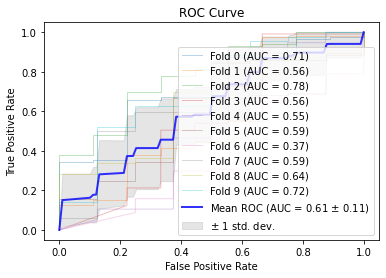

In [ ]:
from numpy import mean
from numpy import std
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import RepeatedKFold
 
model = MLPClassifier(max_iter=100, hidden_layer_sizes=(64,64),activation= 'relu',learning_rate='adaptive') # Include parameter based on grid search output
 
#cv = LeaveOneOut()
#cv = StratifiedKFold(n_splits=5,shuffle=False)
cv = StratifiedKFold(n_splits=10)
  
conf_matrix_list_of_arrays = []
accuracy_scores=[]
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots()
for i,(train_index, test_index) in enumerate(cv.split(X, y)):
 
   X_train, X_test = X[train_index], X[test_index]
   y_train, y_test = y[train_index], y[test_index]
 
   counter=Counter(y_train)
   print(counter)
   oversample = SMOTE()
   X_train, y_train = oversample.fit_resample(X_train, y_train)
   counter = Counter(y_train)
   print(counter)
 
   model.fit(X_train, y_train)
   conf_matrix = confusion_matrix(y_test, model.predict(X_test))
   #print(conf_matrix)
   conf_matrix_list_of_arrays .append(conf_matrix)
   acc_score=accuracy_score(y_test, model.predict(X_test))
   accuracy_scores.append(acc_score)
   #print(classification_report(y_test, model.predict(X_test),labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn'))
   viz = plot_roc_curve(model, X_test, y_test,
                         name='Fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
   interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
   interp_tpr[0] = 0.0
   tprs.append(interp_tpr)
   aucs.append(viz.roc_auc)
 
#ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        #label='Chance', alpha=.8)
 
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)
 
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')
 
ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="ROC Curve")
ax.legend(loc="lower right")
#plt.show()
fig.savefig('/content/drive/My Drive/ROC_Curve.jpg')
 
#conf_matrix=np.add(conf_matrix_list_of_arrays,axis=0)
mean_of_conf_matrix_arrays = np.mean(conf_matrix_list_of_arrays, axis=0)
print(conf_matrix)
print(mean_of_conf_matrix_arrays)
mean_accuracy_scores=np.mean(accuracy_scores, axis=0)
#print(mean_accuracy_scores)
print('Accuracy: %.3f (%.3f)' % (mean(accuracy_scores), std(accuracy_scores)))
 
#print(conf_mat)

# Cross Validation(Train(SMOTE)+Test) and Threshold Moving

Accuracy: 0.908 (0.029)
[0.90983607 0.90983607 0.93442623 0.91803279 0.93442623 0.91803279
 0.8852459  0.90983607 0.90082645 0.90909091]
0.912958948651944


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[[  16   68]
 [  41 1093]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Threshold=0.919, AUC-Score=0.68928
[[ 5  4]
 [20 93]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Threshold=0.941, AUC-Score=0.60029
[[ 3  6]
 [15 98]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Threshold=0.813, AUC-Score=0.72026
[[  5   4]
 [ 13 100]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Threshold=0.909, AUC-Score=0.61799
[[  3   6]
 [ 11 102]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Threshold=0.989, AUC-Score=0.67105
[[ 4  4]
 [18 96]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Threshold=0.096, AUC-Score=0.54496
[[  1   7]
 [  4 110]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Threshold=0.001, AUC-Score=0.55811
[[  1   7]
 [  1 113]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Threshold=0.998, AUC-Score=0.59649
[[ 4  4]
 [35 79]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Threshold=0.442, AUC-Score=0.53595
[[  1   7]
 [  6 107]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Threshold=0.987, AUC-Score=0.69248
[[  4   4]
 [ 13 100]]
[[  4   4]
 [ 13 100]]
[[ 3.1  5.3]
 [13.6 99.8]]
Accuracy: 0.845 (0.067)


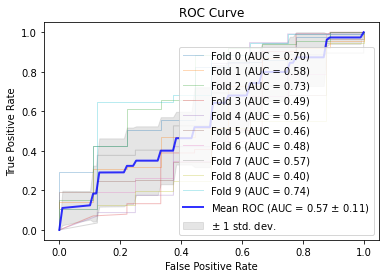

In [ ]:
from numpy import mean
from numpy import std
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import RepeatedKFold

# apply threshold to positive probabilities to create labels
def to_labels(pos_probs, threshold):
	return (pos_probs >= threshold).astype('int')

model = MLPClassifier() # Include parameter based on grid search output


#cv = LeaveOneOut()
#cv = StratifiedKFold(n_splits=5,shuffle=False)
cv = StratifiedKFold(n_splits=10)

scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

scores = cross_val_score(model, X, y, cv=cv,n_jobs=-1)
print(scores)
print(scores.mean())

y_pred = cross_val_predict(model, X, y, cv=cv)
conf_mat = confusion_matrix(y, y_pred)
print(conf_mat)

conf_matrix_list_of_arrays = []
accuracy_scores=[]
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots()
for i,(train_index, test_index) in enumerate(cv.split(X, y)):

   X_train, X_test = X[train_index], X[test_index]
   y_train, y_test = y[train_index], y[test_index]

   #counter=Counter(y_train)
   #print(counter)
   oversample = SMOTE()
   X_train, y_train = oversample.fit_resample(X_train, y_train)
   counter = Counter(y_train)
   #print(counter)

   model.fit(X_train, y_train)
   
   #conf_matrix = confusion_matrix(y_test, model.predict(X_test))
   #print(conf_matrix)
   #conf_matrix_list_of_arrays .append(conf_matrix)
   #acc_score=accuracy_score(y_test, model.predict(X_test))
   #accuracy_scores.append(acc_score)
  
   y_pred = model.predict_proba(X_test)
   # keep probabilities for the positive outcome only
   probs = y_pred[:, 1]
   # define thresholds
   thresholds = arange(0, 1, 0.001)
   #thresholds = arange(0, 1, 0.1)
   # evaluate each threshold
   #scores = [f1_score(y_test, to_labels(probs, t)) for t in thresholds]
   scores = [metrics.roc_auc_score(y_test, to_labels(probs, t)) for t in thresholds]
   # get best threshold
   ix = argmax(scores)
   print('Threshold=%.3f, AUC-Score=%.5f' % (thresholds[ix], scores[ix]))
   conf_matrix = confusion_matrix(y_test, to_labels(probs, thresholds[ix]))
   print(conf_matrix)
   conf_matrix_list_of_arrays .append(conf_matrix)
   acc_score=accuracy_score(y_test, to_labels(probs, thresholds[ix]))
   #print('Accuracy=%.4f' %acc_score)
   accuracy_scores.append(acc_score)

   #print(classification_report(y_test, to_labels(probs, thresholds[ix],labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn'))
   viz = plot_roc_curve(model, X_test, y_test,name='Fold {}'.format(i),alpha=0.3, lw=1, ax=ax)
   interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
   interp_tpr[0] = 0.0
   tprs.append(interp_tpr)
   aucs.append(viz.roc_auc)

#ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        #label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="ROC Curve")
ax.legend(loc="lower right")
#plt.show()
fig.savefig('/content/drive/My Drive/Colab Notebooks/ROC_Curve.jpg')

#conf_matrix=np.add(conf_matrix_list_of_arrays,axis=0)
mean_of_conf_matrix_arrays = np.mean(conf_matrix_list_of_arrays, axis=0)
print(conf_matrix)
print(mean_of_conf_matrix_arrays)
mean_accuracy_scores=np.mean(accuracy_scores, axis=0)
#print(mean_accuracy_scores)
print('Accuracy: %.3f (%.3f)' % (mean(accuracy_scores), std(accuracy_scores)))

#print(conf_mat)

# Cross Validation(Train+Test) 

In [ ]:
from numpy import mean
from numpy import std
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import RepeatedKFold

model = MLPClassifier(hidden_layer_sizes=(64,64),activation= 'relu',learning_rate='adaptive') # Include parameter based on grid search output
#cv = LeaveOneOut()
#cv = StratifiedKFold(n_splits=5,shuffle=False)
cv = StratifiedKFold(n_splits=10)

scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

scores = cross_val_score(model, X, y, cv=cv,n_jobs=-1)
print(scores)
print(scores.mean())

y_pred = cross_val_predict(model, X, y, cv=cv)
conf_mat = confusion_matrix(y, y_pred)
print(conf_mat)

Accuracy: 0.909 (0.022)
[0.90163934 0.92622951 0.91803279 0.91803279 0.91803279 0.8852459
 0.87704918 0.92622951 0.90082645 0.90909091]
0.9080409158650588


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[[  12   72]
 [  38 1096]]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


# Cross Validation(Train+Test) (Seperate Confusion Matrix)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[[  4   5]
 [  6 107]]
[[  0   9]
 [  2 111]]
[[  3   6]
 [  6 107]]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[[  1   8]
 [  2 111]]
[[  3   5]
 [  2 112]]
[[  2   6]
 [  6 108]]
[[  0   8]
 [  1 113]]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[[  1   7]
 [  5 109]]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[[  0   8]
 [  6 107]]
[[  2   6]
 [  3 110]]
[[  1.6   6.8]
 [  3.9 109.5]]


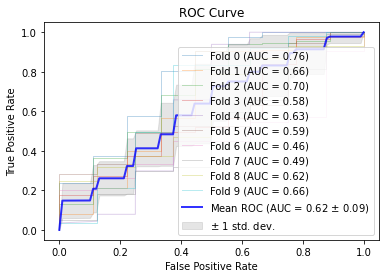

In [ ]:
from numpy import mean
from numpy import std
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import RepeatedKFold


model = MLPClassifier(hidden_layer_sizes=(64,64),activation= 'relu',learning_rate='adaptive') # Include parameter based on grid search output

#cv = LeaveOneOut()
#cv = StratifiedKFold(n_splits=5,shuffle=False)
cv = StratifiedKFold(n_splits=10)

'''scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

scores = cross_val_score(model, X, y, cv=cv,n_jobs=-1)
print(scores)
print(scores.mean())

y_pred = cross_val_predict(model, X, y, cv=cv)
conf_mat = confusion_matrix(y, y_pred)
print(conf_mat)'''

conf_matrix_list_of_arrays = []

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots()
for i,(train_index, test_index) in enumerate(cv.split(X, y)):

   X_train, X_test = X[train_index], X[test_index]
   y_train, y_test = y[train_index], y[test_index]
   model.fit(X_train, y_train)
   conf_matrix = confusion_matrix(y_test, model.predict(X_test))
   print(conf_matrix)
   conf_matrix_list_of_arrays.append(conf_matrix)
   #print(classification_report(y_test, model.predict(X_test),labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn'))
   viz = plot_roc_curve(model, X_test, y_test,
                         name='Fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
   interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
   interp_tpr[0] = 0.0
   tprs.append(interp_tpr)
   aucs.append(viz.roc_auc)

#ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        #label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="ROC Curve")
ax.legend(loc="lower right")
#plt.show()
fig.savefig('/content/drive/My Drive/Colab Notebooks/ROC_Curve.jpg')

mean_of_conf_matrix_arrays = np.mean(conf_matrix_list_of_arrays, axis=0)
print(mean_of_conf_matrix_arrays)

#print(conf_mat)

# Training and Testing Divide

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=None)
# Checking  shapes
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(974, 193)
(244, 193)
(974,)
(244,)


# Ensemble Bagging

In [ ]:
from numpy import mean
from numpy import std
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import RepeatedKFold

model = MLPClassifier(max_iter=100, hidden_layer_sizes=(64,64),activation= 'relu',learning_rate='adaptive') # Include parameter based on grid search output

bagging_models = BaggingClassifier(base_estimator=model,n_estimators=10, random_state=0).fit(X_train, y_train)
y_pred = bagging_models.predict(X_test)

conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)
print(y_test)
print(y_pred)
acc_score=accuracy_score(y_test, y_pred)
print(acc_score)
auc_score = metrics.roc_auc_score(y_test, y_pred)
print(auc_score)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[[  1  16]
 [  0 227]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


# Threshold-Moving for Imbalanced Classification

In [ ]:
# search thresholds for imbalanced classification
from numpy import arange
from numpy import argmax
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# apply threshold to positive probabilities to create labels
def to_labels(pos_probs, threshold):
	return (pos_probs >= threshold).astype('int')

# fit a model

model = MLPClassifier(max_iter=100, hidden_layer_sizes=(64,64),activation= 'relu',learning_rate='adaptive') # Include parameter based on grid search output

model.fit(X_train, y_train)
# predict probabilities
y_pred = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = y_pred[:, 1]
# define thresholds
thresholds = arange(0, 1, 0.001)
#thresholds = arange(0, 1, 0.1)
# evaluate each threshold
#scores = [f1_score(y_test, to_labels(probs, t)) for t in thresholds]
scores = [metrics.roc_auc_score(y_test, to_labels(probs, t)) for t in thresholds]
# get best threshold
ix = argmax(scores)
print('Threshold=%.4f, AUC-Score=%.4f' % (thresholds[ix], scores[ix]))
conf_mat = confusion_matrix(y_test, to_labels(probs, thresholds[ix]))
print(conf_mat)
acc_score=accuracy_score(y_test, to_labels(probs, thresholds[ix]))
print('Accuracy=%.4f' %acc_score)
auc_score = roc_auc_score(y_test, to_labels(probs, thresholds[ix]))
print('AUC Score=%.4f' %auc_score)
print(classification_report(y_test, to_labels(probs, thresholds[ix]),labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn'))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Threshold=0.7920, AUC-Score=0.5802
[[  4  13]
 [ 17 210]]
Accuracy=0.8770
AUC Score=0.5802
              precision    recall  f1-score   support

           0       0.19      0.24      0.21        17
           1       0.94      0.93      0.93       227

    accuracy                           0.88       244
   macro avg       0.57      0.58      0.57       244
weighted avg       0.89      0.88      0.88       244



# Nested Cross Validation with Hyperparameter Estimation and Threshold Moving

Counter({1: 567, 0: 42})
Counter({0: 567, 1: 567})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)

Threshold=0.831, AUC-Score=0.60185
[[ 11  31]
 [ 33 534]]
>acc=0.895, est=0.958, cfg={'activation': 'logistic', 'hidden_layer_sizes': (128, 128), 'learning_rate': 'adaptive', 'solver': 'adam'}
Counter({1: 567, 0: 42})
Counter({0: 567, 1: 567})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)

Threshold=0.387, AUC-Score=0.58422
[[  9  33]
 [ 26 541]]
>acc=0.903, est=0.962, cfg={'activation': 'tanh', 'hidden_layer_sizes': (128,), 'learning_rate': 'adaptive', 'solver': 'adam'}
Accuracy: 0.899 (0.004)
[[ 10.   32. ]
 [ 29.5 537.5]]
[array([[ 11,  31],
       [ 33, 534]]), array([[  9,  33],
       [ 26, 541]])]


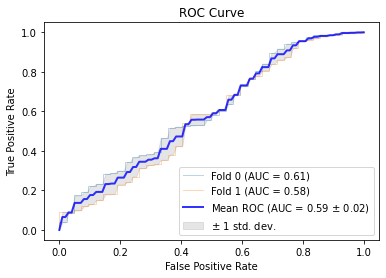

In [ ]:
from numpy import mean
from numpy import std
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import RepeatedKFold
from numpy import arange
from numpy import argmax

# apply threshold to positive probabilities to create labels
def to_labels(pos_probs, threshold):
	return (pos_probs >= threshold).astype('int')

cv_outer = StratifiedKFold(n_splits=2,shuffle=True)

# enumerate splits
outer_results = list()
conf_matrix_list_of_arrays = []

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots()
for i,(train_index, test_index) in enumerate(cv_outer.split(X, y)):

   X_train, X_test = X[train_index], X[test_index]
   y_train, y_test = y[train_index], y[test_index]

   counter=Counter(y_train)
   print(counter)
   oversample = SMOTE()
   X_train, y_train = oversample.fit_resample(X_train, y_train)
   counter = Counter(y_train)
   print(counter)

   cv_inner = StratifiedKFold(n_splits=2,shuffle=True)


   model = MLPClassifier()
   # define search space
   space = dict()
   space['hidden_layer_sizes'] = [(64,),(64,64,),(128,),(128,128,)]
   space['activation'] = ["identity", "logistic","tanh","relu"]
   space['solver'] = ["lbfgs", "sgd", "adam"]
   space['learning_rate'] = ["constant", "invscaling","adaptive"]


   # define search
   search = GridSearchCV(model, space, scoring='accuracy', cv=cv_inner, refit=True)
   # execute search
   result = search.fit(X_train, y_train)
   # get the best performing model fit on the whole training set
   best_model = result.best_estimator_
   # evaluate model on the hold out dataset
   #y_pred = best_model.predict(X_test)
   y_pred = best_model.predict_proba(X_test)
   # keep probabilities for the positive outcome only
   probs = y_pred[:, 1]
   # define thresholds
   thresholds = arange(0, 1, 0.001)
   # evaluate each threshold
   #scores = [f1_score(y_test, to_labels(probs, t)) for t in thresholds]
   scores = [metrics.roc_auc_score(y_test, to_labels(probs, t)) for t in thresholds]
   # get best threshold
   ix = argmax(scores)
   print('Threshold=%.3f, AUC-Score=%.5f' % (thresholds[ix], scores[ix]))
   conf_matrix = confusion_matrix(y_test, to_labels(probs, thresholds[ix]))
   print(conf_matrix)
   acc=accuracy_score(y_test, to_labels(probs, thresholds[ix]))
   #print('Accuracy=%.4f' %acc)

   # store the result
   outer_results.append(acc)
   # report progress
   print('>acc=%.3f, est=%.3f, cfg=%s' % (acc, result.best_score_, result.best_params_))
   conf_matrix_list_of_arrays.append(conf_matrix)
   #print(classification_report(y_test, model.predict(X_test),labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn'))
   viz = plot_roc_curve(best_model, X_test, y_test,
                         name='Fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
   interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
   interp_tpr[0] = 0.0
   tprs.append(interp_tpr)
   aucs.append(viz.roc_auc)

print('Accuracy: %.3f (%.3f)' % (mean(outer_results), std(outer_results)))

#ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        #label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="ROC Curve")
ax.legend(loc="lower right")
#plt.show()
fig.savefig('/content/drive/My Drive/Colab Notebooks/ROC_Curve.jpg')

mean_of_conf_matrix_arrays = np.mean(conf_matrix_list_of_arrays, axis=0)
print(mean_of_conf_matrix_arrays)

print(conf_matrix_list_of_arrays)

# p-value Test

In [ ]:
from sklearn.model_selection import permutation_test_score
clf = MLPClassifier(max_iter=100, hidden_layer_sizes=(64,64),activation= 'relu',learning_rate='adaptive') # Include parameter based on grid search output
cv = StratifiedKFold(2, shuffle=True, random_state=0)
#cv = StratifiedKFold(n_splits=10)

score_cough, perm_scores_cough, pvalue_cough = permutation_test_score(
    clf, X, y, scoring="accuracy", cv=cv, n_permutations=100)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


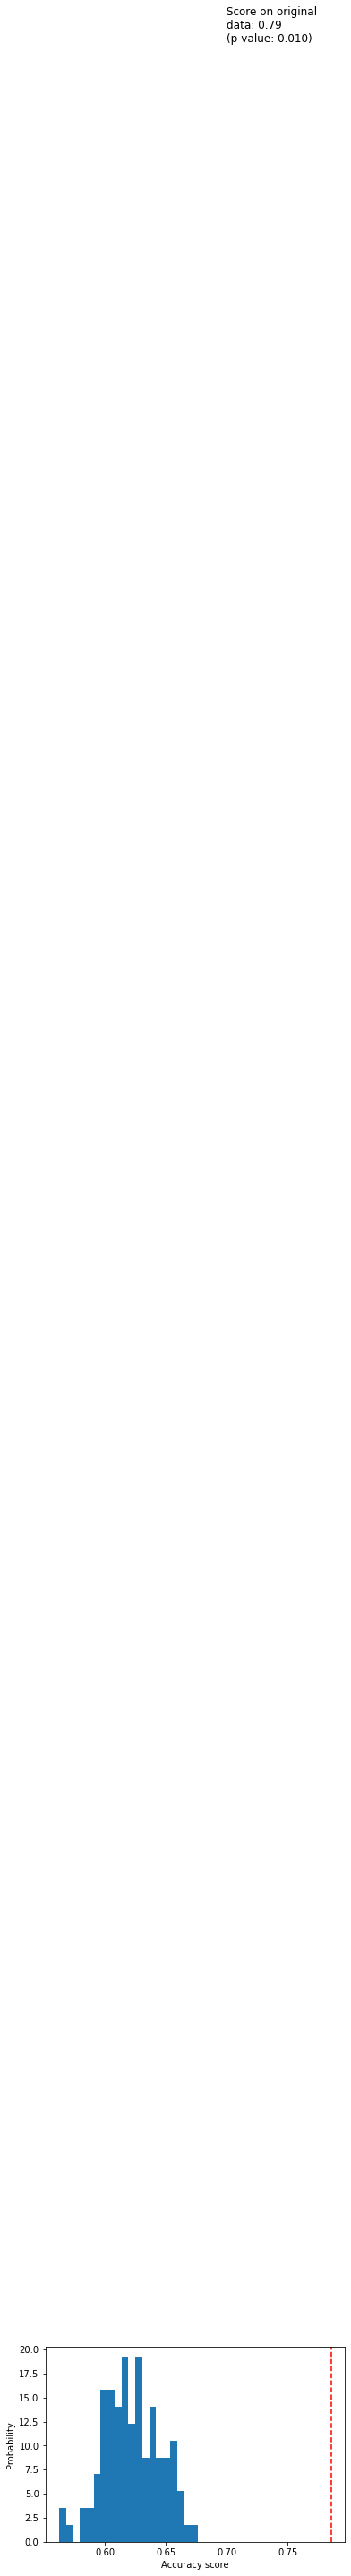

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.hist(perm_scores_cough, bins=20, density=True)
ax.axvline(score_cough, ls='--', color='r')
score_label = (f"Score on original\ndata: {score_cough:.2f}\n"
               f"(p-value: {pvalue_cough:.3f})")
ax.text(0.7, 260, score_label, fontsize=12)
ax.set_xlabel("Accuracy score")
_ = ax.set_ylabel("Probability")